<a href="https://colab.research.google.com/github/LeeYoungSeo1/CFD_foundation/blob/main/week2_cfl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = 1.0
Nx = 51
L = 1.0
dx = L / (Nx - 1)
x = np.linspace(0, L, Nx)

T_left, T_right = 1.0, 0.0
T0 = np.zeros(Nx)
T0[0]  = T_left
T0[-1] = T_right

In [3]:
def explicit_euler_heat(T_init, Nt, r):
  T=T_init.copy()
  for i in range(Nt):
    Tn=T.copy()
    T[1:-1]=Tn[1:-1]+r*(Tn[2:]-2*Tn[1:-1]+Tn[:-2])
    T[0]=T_left
    T[-1]=T_right
  return T

In [4]:
r_list=[0.10, 0.25, 0.49, 0.51, 0.60]
Nt=300

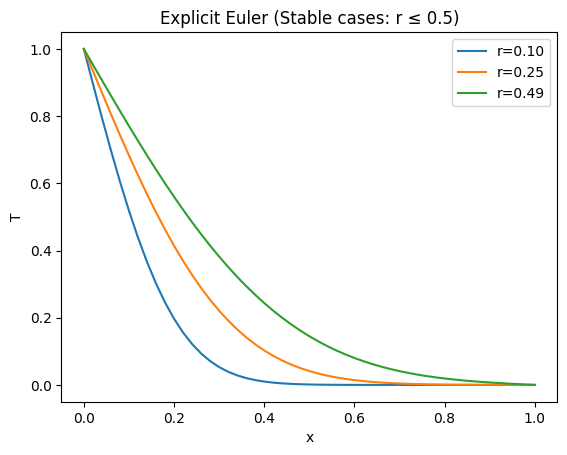

In [5]:
stable_r_list = [0.10, 0.25, 0.49]
plt.figure()
for r in stable_r_list:
  T_end=explicit_euler_heat(T0, Nt, r)
  plt.plot(x, T_end, label=f'r={r:.2f}')

plt.title("Explicit Euler (Stable cases: r ≤ 0.5)")
plt.xlabel("x"); plt.ylabel("T")
plt.legend(); plt.show()

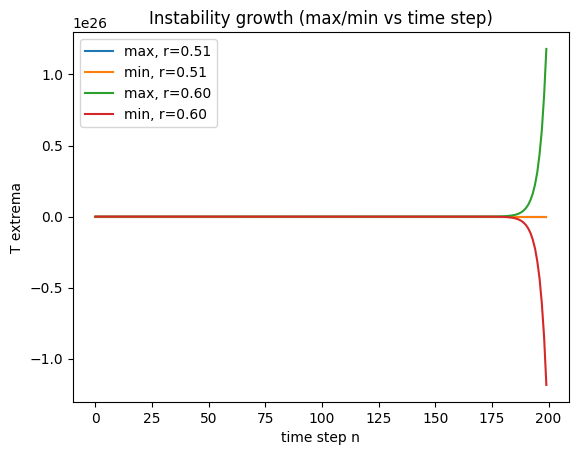

In [6]:
def track_growth(T_init,Nt,r):
  T=T_init.copy()
  max_hist,min_hist=[],[]
  for i in range(Nt):
    Tn=T.copy()
    T[1:-1] = Tn[1:-1] + r*(Tn[2:] - 2*Tn[1:-1] + Tn[:-2])
    T[0] = T_left
    T[-1] = T_right
    max_hist.append(T.max())
    min_hist.append(T.min())
  return np.array(max_hist), np.array(min_hist)


unstable_r_list = [0.51, 0.60]

plt.figure()
for r in unstable_r_list:
    max_h, min_h = track_growth(T0, Nt=200, r=r)
    plt.plot(max_h, label=f"max, r={r:.2f}")
    plt.plot(min_h, label=f"min, r={r:.2f}")

plt.title("Instability growth (max/min vs time step)")
plt.xlabel("time step n"); plt.ylabel("T extrema")
plt.legend(); plt.show()